# Level 1+2 Jupyter Notebook

To run this Jupyter Note book
1) Go to kernel → Restart & Run All
2) Scoll back to top of the page and hit here where it says "Click here to show/hide codes in this notebook" (optional)
3) Jupyer Notebook will run 

In [1]:
from IPython.display import HTML
HTML('''
<script>
code_show=false;
function code_toggle(){
    if(code_show){$('.prompt, .input, .output_stderr, .output_error').hide();}
    else{$('.input, .prompt, .output_stderr, .output_error').show();}
    code_show=!code_show;
}
function initialize(){
    document.body.style.fontFamily='Palatino';
    var output=$('.output_subarea.output_text.output_stream.output_stdout');
    $.merge(output,$('.output_subarea.output_text.output_result'));
    for(var i=0;i<output.length;i++)for(var j=0;j<output[i].children.length;j++)
        output[i].children[j].style.fontFamily='Palatino';
    code_toggle();
}
$(document).ready(initialize);
</script>
Click <a href="javascript:code_toggle()">here</a> to show/hide codes in this notebook.
''')

In [2]:
print("Code is running")

Code is running


# Setup 
Be prepared to answer questions: 
    
    1) Type of Computer System 
    2) Test Type 
    3) Number of tests run  

In [3]:
%%capture
!pip install openpyxl;
!pip install uncertainties;
!pip install tabulate;
!pip install xlrd; 
!pip install scipy; 
!pip install easygui; 

In [4]:
import sys; sys.path.insert(0, '.')
import os
import pandas as pd
import uncertainties
from uncertainties import ufloat
import csv
from datetime import datetime as dt
from tabulate import tabulate
from LEMS_MakeInputFile_EnergyCalcs import LEMS_MakeInputFile_EnergyCalcs
import colorama
from colorama import Fore, Back, Style

In [5]:
print("Please specify computer system. Put L for Linux and W for windows")
comp_program = str(input())

Please specify computer system. Put L for Linux and W for windows
w


In [6]:
if comp_program =='L' or comp_program == 'l':
    print("You have a Linux System")
    print("Please specify test type. Put 19867 for iso 19867 (LEMS) and 19869 for iso 19869 (PEMS)")
    test_type = int(input())
elif comp_program == 'W' or comp_program == 'w': 
    print("You have a Windows System")
    print("Please specify test type. Put 19867 for iso 19867 (LEMS) and 19869 for iso 19869 (PEMS)")
    test_type = int(input())
else: 
    print("You have not entered a possible computer system ")

You have a Windows System
Please specify test type. Put 19867 for iso 19867 (LEMS) and 19869 for iso 19869 (PEMS)
19867


In [7]:
print("How many tests did you perform?")
num_tests = int(input())
testnames=[]

How many tests did you perform?
1


# Path for Data Entry form 

The path to the data entry form is the location of the data entry form on your computer
An example of how to get location of a file is 
1) Open File Explorer 
2) Double Click on file (will open a menu of options) 
3) Click copy path 
4) Enter path when prompted but DO NOT INCLUDE QUOATION MARKS (") 

The file input must be a spreadsheet (ends in .xlsx) 

In [8]:
directory_list=[]
file_list=[]
testname_list = []
for x in range(num_tests):
    sheetinputpath= input("Input path of data entry form (spreadsheet):\n")
    directory, filename = os.path.split(sheetinputpath)
    datadirectory, testname = os.path.split(directory)
    logname = testname + '_log.txt'
    logpath = os.path.join(directory, logname)
    inputpath=sheetinputpath
    outputpath=os.path.join(directory,testname+'_EnergyInputs.csv')
    LEMS_MakeInputFile_EnergyCalcs(inputpath,outputpath,logpath)
    directory_list.append(directory)
    file_list.append(filename)
    testname_list.append(testname)


Input path of data entry form (spreadsheet):
C:\Users\Sam\Documents\research projects\DOE heating stove\choosing baseline stoves\snow ball sampling\GP100\4.21.23\4.21.23_DataEntryForm.xlsx
LEMS_MakeInputFile_EnergyCalcs v0.3   20230424 09:15:59
loaded: C:\Users\Sam\Documents\research projects\DOE heating stove\choosing baseline stoves\snow ball sampling\GP100\4.21.23\4.21.23_DataEntryForm.xlsx
created: C:\Users\Sam\Documents\research projects\DOE heating stove\choosing baseline stoves\snow ball sampling\GP100\4.21.23\4.21.23_EnergyInputs.csv


In [9]:
print("Would you like to calculate energy metrics? Press 0-No 1-Yes")
forward = int(input())

Would you like to calculate energy metrics? Press 0-No 1-Yes
0


In [10]:
if forward == 1:
    if test_type == 19867: 
            import LEMS_EnergyCalcs as EnergyCalcs
            import LEMS_EnergyCalcs_L2 as EnergyCalcs2  
    elif test_type == 19869:
        print("No code has yet been figured out for this test type")
    else: 
        print("Test Type unavaible")
else: 
    print("Calculating Energy Metrics skipped")

Calculating Energy Metrics skipped


In [11]:
if forward == 1:
    if test_type == 19867: 
        for idx in range (num_tests):
            cstr= " This is for " + testname_list[idx] + " "
            print (Fore.BLUE + cstr.center(70, '-'))
            print(Style.RESET_ALL)
            inputpath=os.path.join(directory_list[idx],testname_list[idx]+'_EnergyInputs.csv')
            outputpath=os.path.join(directory_list[idx],testname_list[idx]+'_EnergyOutputs.csv')
            trial, units, uval = EnergyCalcs.LEMS_EnergyCalcs(inputpath, outputpath, logpath)
            if num_tests == 1: 
                x_data = 0 
                idx = 0
                for key, value in trial['hp'].items(): 
                    x_data = x_data + 1
                data = [0]*x_data
                for key, value in trial['hp'].items():
                    data[idx] = [key, value]
                    idx = idx + 1
                idx = 0
                for key, value in trial['mp'].items():
                    data[idx].append(value)
                    idx = idx + 1
                idx = 0
                for key, value in trial['lp'].items():
                    data[idx].append(value)
                    idx = idx + 1
                idx = 0

                x_const = 20 
                idx = 0
                constants = [0]*x_const
                for key, value in uval.items():
                    if idx < x_const:
                        constants[idx] = [key,value]
                        idx = idx + 1 
        if num_tests > 1: 
            inputpath = []
            for idx in range(num_tests):
                inpath=os.path.join(directory_list[idx],testname_list[idx]+'_EnergyInputs.csv')
                inputpath.append(inpath)

            outputpath=os.path.join(directory,testname+'_EnergyOutputs_Combined.csv')

            trial,averages, data_values, N, stadev, interval, high_tier, low_tier, COV = EnergyCalcs2.LEMS_EnergyCalcs_L2(inputpath, outputpath, testname_list)
            x_data = 0 
            idx = 0
            for key, value in trial[testname_list[0]].items(): 
                x_data = x_data + 1
            data = [0]*x_data
            test = 0
            for names in testname_list:
                if test == 0: 
                    for key, value in trial[names].items():
                        data[idx] = [key, value]
                        idx = idx + 1
                    test = test + 1
                    idx= 0
                else:  
                    for key,value in trial[names].items():
                        data[idx].append(value)
                        idx = idx +1
                    test = test + 1
                    idx = 0
    

# Constants 

In [12]:
if forward == 1:
    if test_type == 19867: 
        if num_tests == 1:
            head = ["Varaible", "Value"]
            print(tabulate(constants, tablefmt="grid"))
        else: 
            print ("no info given")
    

# Engergy Calculations

In [13]:
if forward == 1:
    if test_type == 19867: 
        if num_tests == 1: 
            head = ["Varaible", "High Power Value", "Medium Power Value","Low Power Value", "Units"]
            print(tabulate(data, headers=head, tablefmt="grid"))
        else: 
            head = [] 
            head.append("Variable")
            for names in testname_list: 
                head.append(names)
            print(tabulate(data, headers=head, tablefmt="grid"))

# Comparison

In [14]:
if forward == 1: 
    if test_type == 19867: 
        if num_tests == 1:
            print("No comparison needed")
        else:
            x_data = 0
            idx  = 0

            # find number of values 
            for key,value in averages.items():
                x_data = x_data + 1
            holder = [0]*x_data

            # add averages to list 
            for key,value in averages.items():
                holder[idx]=[key,value]
                idx = idx + 1
            idx = 0

            # add N to list 
            for k_N,v_N in N.items():
                holder[idx].append(v_N)
                idx = idx + 1
            idx = 0

            #add stadev to list 
            for k_s,v_s in stadev.items():
                holder[idx].append(v_s)
                idx = idx + 1
            idx = 0

            #add interval to list 
            for k_i,v_i in stadev.items():
                holder[idx].append(v_i)
                idx = idx + 1
            idx = 0

            #add high_tier to list 
            for k_h,v_h in high_tier.items():
                holder[idx].append(v_h)
                idx = idx + 1
            idx = 0

            #add low tier to list 
            for k_l,v_l in low_tier.items():
                holder[idx].append(v_l)
                idx = idx + 1
            idx = 0

            #add COV to list 
            for k_c,v_c in COV.items():
                holder[idx].append(v_c)
                idx = idx + 1
            idx = 0

            head = ["Variable", "Averages", "N","Stadev", "Interval", "High Tier", "Low Tier", "COV"]

            print(tabulate(holder,headers = head, tablefmt="grid"))


# Adjust Calculations


In [15]:
print("Would you like to adjust sensor calibrations? Press 0-No 1-Yes")
forward = int(input())

Would you like to adjust sensor calibrations? Press 0-No 1-Yes
1


In [16]:
if forward == 1: 
    if test_type == 19867:
        import LEMS_Adjust_Calibrations as adjust
    elif test_type == 19869:
        print("No code has yet been figured out for this test type")
    else: 
        print("Test Type unavaible")
else:
    print("Adust Sensor Calibrations skipped")

In [17]:
if forward == 1:  
    if test_type == 19867: 
        for idx in range (num_tests):
            cstr= " This is for " + testname_list[idx] + " "
            print (Fore.BLUE + cstr.center(70, '-'))
            print(Style.RESET_ALL)
            inputpath=os.path.join(directory_list[idx],testname_list[idx]+'_RawData.csv')
            outputpath=os.path.join(directory_list[idx],testname_list[idx]+'_RawData_Recalibrated.csv')
            headerpath = os.path.join(directory_list[idx],testname_list[idx]+'_Header.csv')
            adjust.LEMS_Adjust_Calibrations(inputpath,outputpath,headerpath,logpath)

------------------------ This is for 4.21.23 -------------------------

LEMS_Adjust_Calibrations v0.1   20230424 09:16:07
Header file created:

C:\Users\Sam\Documents\research projects\DOE heating stove\choosing baseline stoves\snow ball sampling\GP100\4.21.23\4.21.23_Header.csv

firmware_version=SB4003.16
no channels were recalculated
created: C:\Users\Sam\Documents\research projects\DOE heating stove\choosing baseline stoves\snow ball sampling\GP100\4.21.23\4.21.23_RawData_Recalibrated.csv


# Time Shift Calculations 

In [18]:
print("Would you like to correct for response times? Press 0-No 1-Yes")
forward = int(input())

Would you like to correct for response times? Press 0-No 1-Yes
1


In [19]:
if forward == 1: 
    if test_type == 19867:
        import LEMS_ShiftTimeSeries as time
    elif test_type == 19869:
        print("No code has yet been figured out for this test type")
    else: 
        print("Test Type unavaible")
else: 
    print("Correcting for response times skipped")

In [20]:
if forward == 1: 
    if test_type == 19867:
        for idx in range(num_tests):
            cstr= " This is for " + testname_list[idx] + " "
            print (Fore.BLUE + cstr.center(70, '-'))
            print(Style.RESET_ALL)
            inputpath=os.path.join(directory_list[idx],testname_list[idx]+'_RawData_Recalibrated.csv')
            outputpath=os.path.join(directory_list[idx],testname_list[idx]+'_RawData_Shifted.csv')
            timespath = os.path.join(directory_list[idx],testname_list[idx]+'_TimeShifts.csv')
            time.LEMS_ShiftTimeSeries(inputpath,outputpath,timespath,logpath)

------------------------ This is for 4.21.23 -------------------------

LEMS_ShiftTimeSeries v0.2   20230424 09:16:16
Loaded time series data file:C:\Users\Sam\Documents\research projects\DOE heating stove\choosing baseline stoves\snow ball sampling\GP100\4.21.23\4.21.23_RawData_Recalibrated.csv

TimeShifts input file created:
C:\Users\Sam\Documents\research projects\DOE heating stove\choosing baseline stoves\snow ball sampling\GP100\4.21.23\4.21.23_TimeShifts.csv
created new shifted time series data file:
C:\Users\Sam\Documents\research projects\DOE heating stove\choosing baseline stoves\snow ball sampling\GP100\4.21.23\4.21.23_RawData_Shifted.csv


#  Subtracting background

In [21]:
print("Would you like to subtract background? Press 0-No 1-Yes")
forward = int(input())

Would you like to subtract background? Press 0-No 1-Yes
1


In [22]:
if forward == 1: 
    if test_type == 19867:
        import LEMS_SubtractBkg as sub
    elif test_type == 19869:
        print("No code has yet been figured out for this test type")
    else: 
        print("Test Type unavaible")
else: 
    print("Subtracting Background skipped")

------------------------ This is for 4.21.23 -------------------------

LEMS_SubtractBkg v0.3   20230424 09:16:22
loaded energy input file to get phase start and end times: C:\Users\Sam\Documents\research projects\DOE heating stove\choosing baseline stoves\snow ball sampling\GP100\4.21.23\4.21.23_RawData_Shifted.csv

Created phase times input file:
C:\Users\Sam\Documents\research projects\DOE heating stove\choosing baseline stoves\snow ball sampling\GP100\4.21.23\4.21.23_PhaseTimes.csv


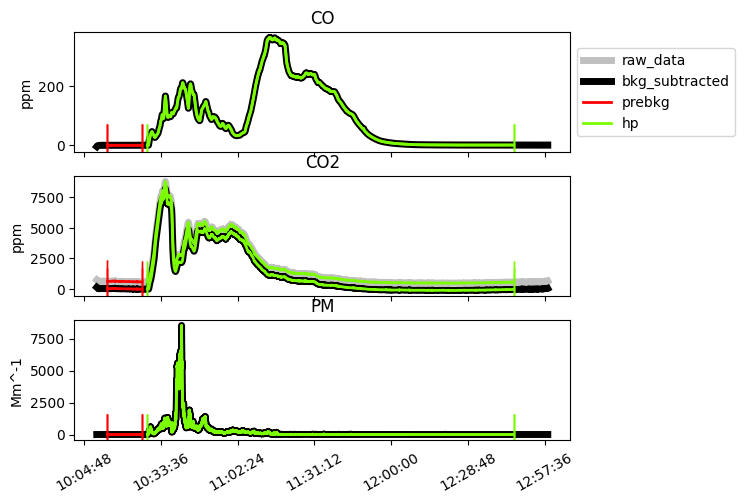


background subtraction report:

phase averages before background subtraction:
channel   units     prebkg    hp        bkgValue  
-------   -----     ------    ------    ------    
CO        ppm       -0.1      95.9      -0.1      
CO2       ppm       600.3     1933.6    600.3     
PM        Mm^-1     -4.3      220.9     -4.3      
VOC       ppm       -29.0     -29.6     -29.0     
CH4       ppm       2000.0    2000.0    2000.0    

phase averages after background subtraction:
channel   units     prebkg    hp        bkgValue  
-------   -----     ------    ------    ------    
CO        ppm       0.0       96.0      0.0       
CO2       ppm       0.0       1333.3    0.0       
PM        Mm^-1     -0.0      225.1     0.0       
VOC       ppm       0.0       -0.6      0.0       
CH4       ppm       0.0       0.0       0.0       
created background-corrected time series data file:
C:\Users\Sam\Documents\research projects\DOE heating stove\choosing baseline stoves\snow ball sampling\GP100\

In [23]:
if forward == 1: 
    if test_type == 19867: 
        for idx in range(num_tests):   
            cstr= " This is for " + testname_list[idx] + " "
            print (Fore.BLUE + cstr.center(70, '-'))
            print(Style.RESET_ALL)
            inputpath=os.path.join(directory_list[idx],testname_list[idx]+'_RawData_Shifted.csv')
            energyinputpath = os.path.join(directory_list[idx],testname_list[idx]+'_EnergyInputs.csv')
            outputpath=os.path.join(directory_list[idx],testname_list[idx]+'_TimeSeries.csv')
            aveoutputpath=os.path.join(directory_list[idx],testname_list[idx]+'_Averages.csv')
            timespath = os.path.join(directory_list[idx],testname_list[idx]+'_PhaseTimes.csv')
            sub.LEMS_SubtractBkg(inputpath,energyinputpath,outputpath,aveoutputpath,timespath,logpath)

# Grav Calculations 


In [ ]:
print("Would you like to calculate gravimetric PM? Press 0-No 1-Yes")
forward = int(input())

Would you like to calculate gravimetric PM? Press 0-No 1-Yes


In [ ]:
if forward == 1: 
    if test_type == 19867: 
        import LEMS_GravCalcs as GravCalcs
    elif test_type == 19869:
        print("No code has yet been figured out for this test type")
    else: 
        print("Test Type unavaible")
else: 
    print("Gravimetric Calulations skipped")

In [ ]:
if forward == 1:
    if test_type == 19867: 
        for idx in range(num_tests):
            cstr= " This is for " + testname_list[idx] + " "
            print (Fore.BLUE + cstr.center(70, '-'))
            print(Style.RESET_ALL)
            gravinputpath=os.path.join(directory_list[idx],testname_list[idx]+'_GravInputs.csv')
            aveinputpath = os.path.join(directory_list[idx],testname_list[idx]+'_Averages.csv')
            timespath = os.path.join(directory_list[idx],testname_list[idx]+'_PhaseTimes.csv')
            gravoutputpath=os.path.join(directory_list[idx],testname_list[idx]+'_GravOutputs.csv')
            GravCalcs.LEMS_GravCalcs(gravinputpath,aveinputpath,timespath,gravoutputpath,logpath)

#  Emmision Calculations 

In [ ]:
print("Would you like to calculate emission metrics? Press 0-No 1-Yes")
forward = int(input())

In [ ]:
if forward == 1: 
    if test_type == 19867: 
        import LEMS_EmissionCalcs as emis
    elif test_type == 19869:
        print("No code has yet been figured out for this test type")
    else: 
        print("Test Type unavaible")
else: 
    print("Calulating Emission Metrics skipped")

In [ ]:
if forward == 1: 
    if test_type == 19867: 
        for idx in range(num_tests):
            cstr= " This is for " + testname_list[idx] + " "
            print (Fore.BLUE + cstr.center(70, '-'))
            print(Style.RESET_ALL)
            inputpath=os.path.join(directory_list[idx],testname_list[idx]+'_TimeSeries.csv')
            energypath=os.path.join(directory_list[idx],testname_list[idx]+'_EnergyOutputs.csv')
            gravinputpath=os.path.join(directory_list[idx],testname_list[idx]+'_GravOutputs.csv')
            aveinputpath = os.path.join(directory_list[idx],testname_list[idx]+'_Averages.csv')
            timespath = os.path.join(directory_list[idx],testname_list[idx]+'_PhaseTimes.csv')
            emisoutputpath=os.path.join(directory_list[idx],testname_list[idx]+'_EmissionOutputs.csv')
            alloutputpath=os.path.join(directory_list[idx],testname_list[idx]+'_AllOutputs.csv')
            allnames,allunits,allval,allunc,alluval = emis.LEMS_EmissionCalcs(inputpath,energypath,gravinputpath,aveinputpath,emisoutputpath,alloutputpath,logpath)
            data = [0]*len(allnames)
            for x in range(len(allnames)):
                data[x] = [allnames[x], allunits[allnames[x]], allval[allnames[x]], allunc[allnames[x]]]
            print(tabulate(data, tablefmt="grid"))
